# Prelude

In [1]:
from importlib import reload as re

In [2]:
import landau as ld
import landau.interpolate as ldi
import landau.calculate as ldc

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

# Toy Example

In [7]:
l1 = ld.TemperatureDependentLinePhase(
    "l0", fixed_concentration=0, temperatures=[1, 750, 1000], free_energies=[2, 1.80, 1.00], interpolator=ldi.PolyFit(3)
)
l2 = ld.TemperatureDependentLinePhase(
    "l1", fixed_concentration=1, temperatures=[1, 750, 1000], free_energies=[3, 2.80, 2.00], interpolator=ldi.PolyFit(3)
)
l3 = ld.TemperatureDependentLinePhase(
    "l2",
    fixed_concentration=0.5,
    temperatures=[1, 750, 1000],
    free_energies=[2.45, 2.00, 1.42],
    interpolator=ldi.PolyFit(3),
)
liq = ld.IdealSolution("liquid", l1, l2)
rliq = ld.RegularSolution("liquid", [l1, l3, l2])

In [8]:
s1 = ld.TemperatureDependentLinePhase(
    "s0", fixed_concentration=0, temperatures=[1, 750, 1000], free_energies=[1.9, 1.6, 1.2], interpolator=ldi.SGTE(2)
)
s2 = ld.TemperatureDependentLinePhase(
    "s1", fixed_concentration=1, temperatures=[1, 750, 1000], free_energies=[2.9, 2.6, 2.2], interpolator=ldi.SGTE(2)
)
s3 = ld.TemperatureDependentLinePhase(
    "s3",
    fixed_concentration=0.4,
    temperatures=[1, 750, 1000],
    free_energies=np.array([2.4, 1.85, 1.45]) - 0.05,
    interpolator=ldi.SGTE(3),
)
sol = ld.IdealSolution("solid", s1, s2)

In [9]:
Ts = np.linspace(50, 1000, 100)

/home/ponder/science/phd/dev/landau/landau/interpolate.py:59: OptimizeWarning: Covariance of the parameters could not be estimated
  parameters, *_ = so.curve_fit(G_calphad, x, y, p0=[0]*self.nparam)


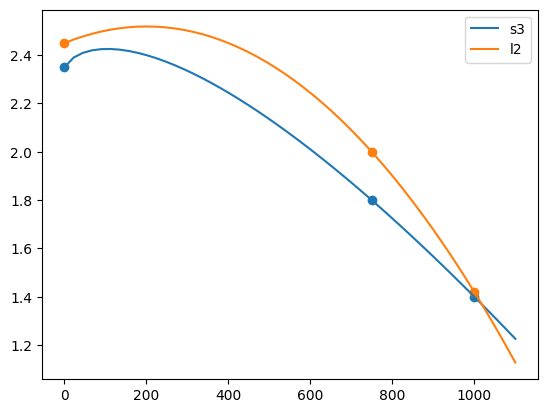

In [10]:
s3.check_interpolation()
l3.check_interpolation()
plt.legend()

In [56]:
c = np.linspace(0, 1, 75)[1:-1]
mu = 1 + ld.phases.kB * 4000 * np.log(c / (1 - c))

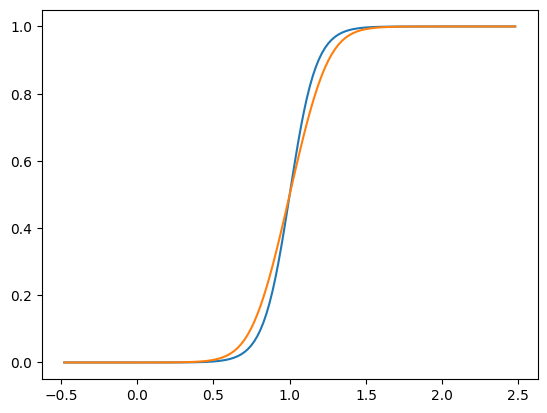

In [57]:
plt.plot(mu, liq.concentration(1000, mu))
plt.plot(mu, rliq.concentration(1000, mu))

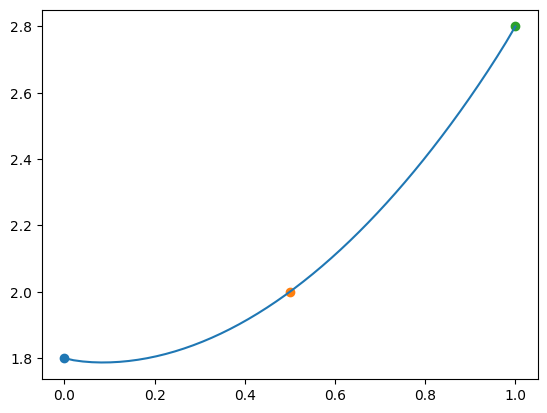

In [58]:
rliq.check_interpolation(750)

In [59]:
# df = ppdt.calc_phase_diagram([liq, s1, s2], np.linspace(50, 1000), mu, refine=True)

In [60]:
from importlib import reload as re

re(ld.phases)
re(ld)

<module 'landau' from '/home/ponder/science/phd/dev/landau/landau/__init__.py'>

In [61]:
df = ldc.calc_phase_diagram([rliq, sol, s3], np.linspace(500, 1000, 50), mu, refine=True)

<Axes: xlabel='c', ylabel='T'>

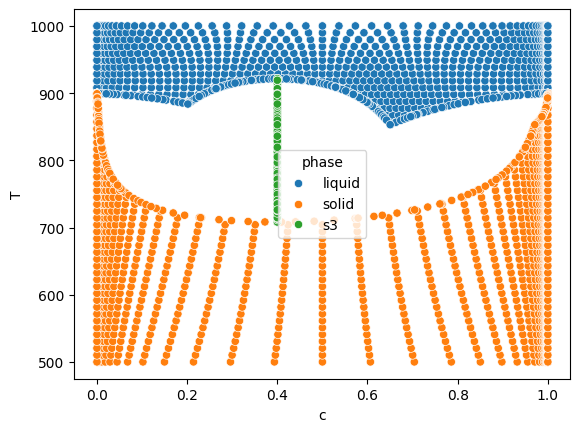

In [62]:
sns.scatterplot(data=df.query("stable"), x="c", y="T", hue="phase")

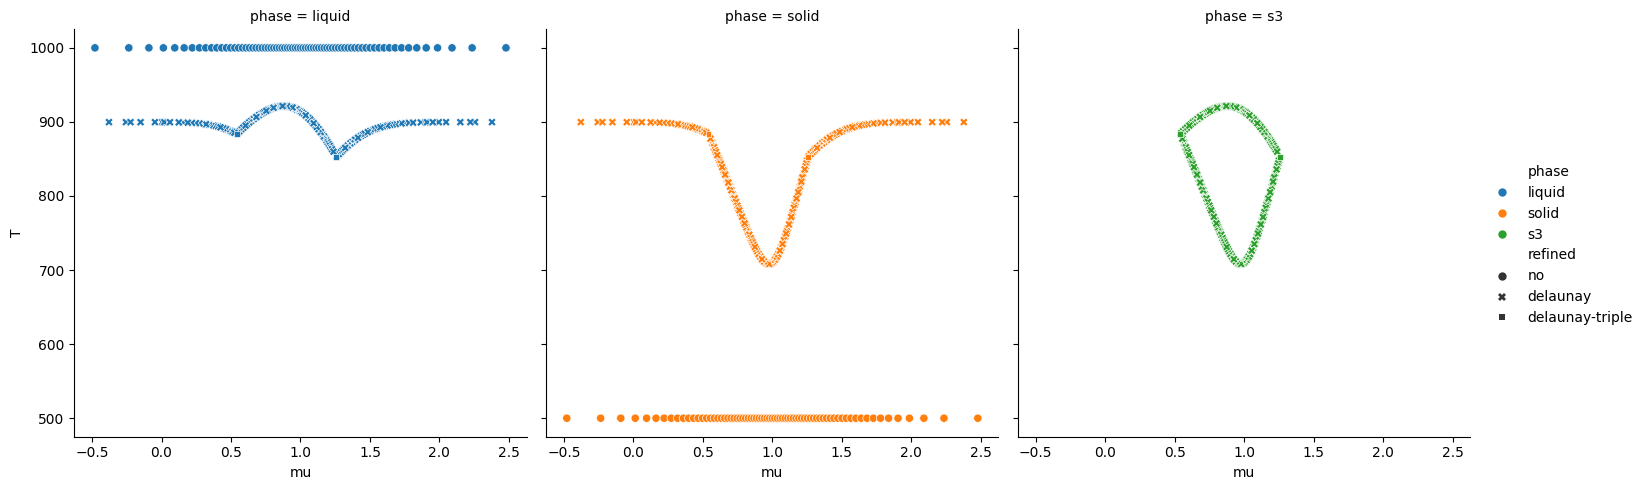

In [63]:
sns.relplot(
    data=df.query("border"),
    x="mu",
    y="T",
    hue="phase",
    col="phase",
    style="refined",
)

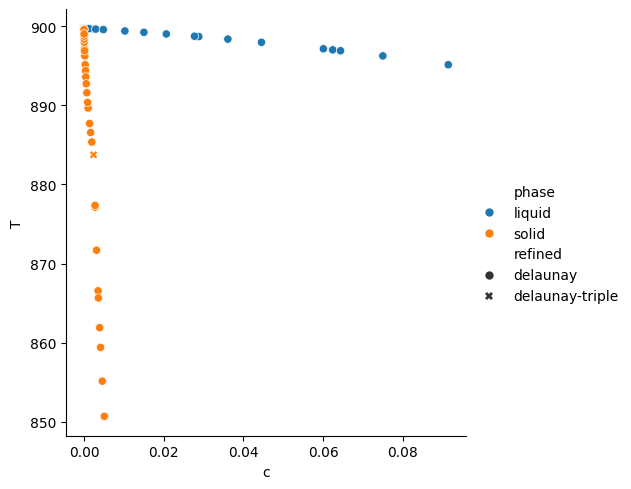

In [64]:
sns.relplot(
    data=df.query("border and 850<T<920 and c<.1"),
    x="c",
    y="T",
    hue="phase",
    # col='phase',
    style="refined",
)

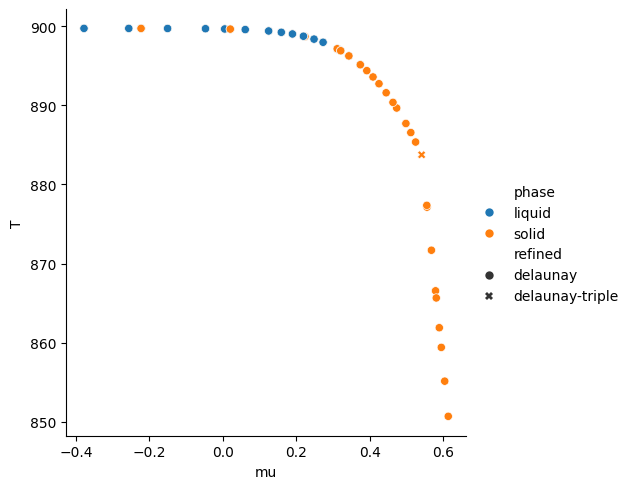

In [65]:
sns.relplot(
    data=df.query("border and 850<T<920 and c<.1"),
    x="mu",
    y="T",
    hue="phase",
    # col='phase',
    style="refined",
)

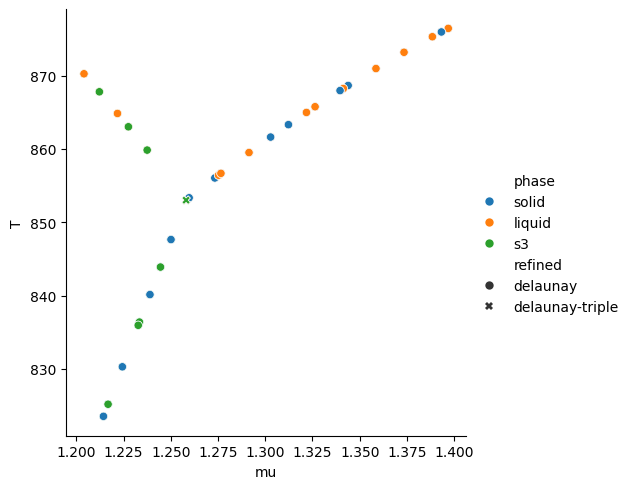

In [66]:
sns.relplot(
    data=df.query("border and 820<T<880 and 1.2<mu<1.4"),
    x="mu",
    y="T",
    hue="phase",
    # col='phase',
    style="refined",
)

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


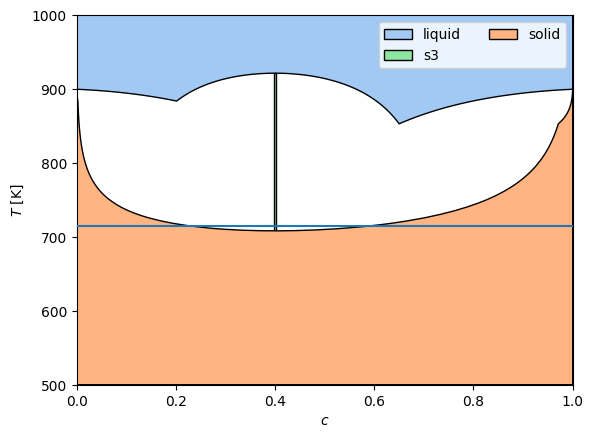

In [67]:
ld.plot_phase_diagram(df)
plt.axhline(714.285714, zorder=10)
# plt.ylim(750, 1000)

In [68]:
p = ld.InterpolatingPhase(
    "test",
    [
        ld.LinePhase("s0", 0.65, 2.50, 0.00005),
        ld.LinePhase("s0", 0.75, 2.40, 0.00010),
        ld.LinePhase("s0", 0.85, 2.50, 0.00005),
    ],
    num_coeffs=3,
    num_samples=250,
)

(1.8, 3.0)

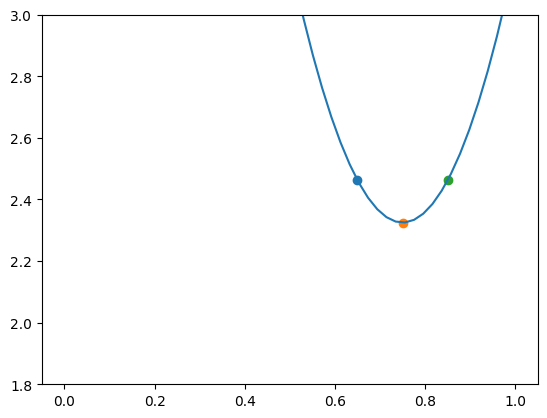

In [69]:
p.check_interpolation(750)
plt.ylim(1.8, 3)

In [73]:
c = np.linspace(0, 1, 50)[1:-1]
mu = 1 + ld.phases.kB * 4000 * np.log(c / (1 - c))

In [74]:
%%time
df = ldc.calc_phase_diagram([rliq, sol, p, s3], np.linspace(250, 1000, 50), mu, refine=True)

CPU times: user 3.99 s, sys: 16.6 ms, total: 4 s
Wall time: 4.01 s


<Axes: xlabel='c', ylabel='T'>

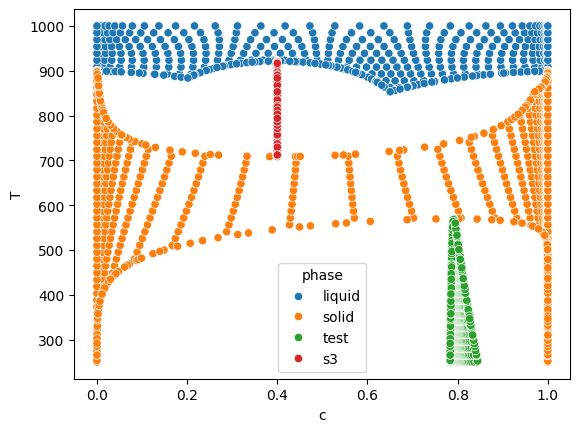

In [75]:
sns.scatterplot(data=df.query("stable"), x="c", y="T", hue="phase")

<Axes: xlabel='c', ylabel='T'>

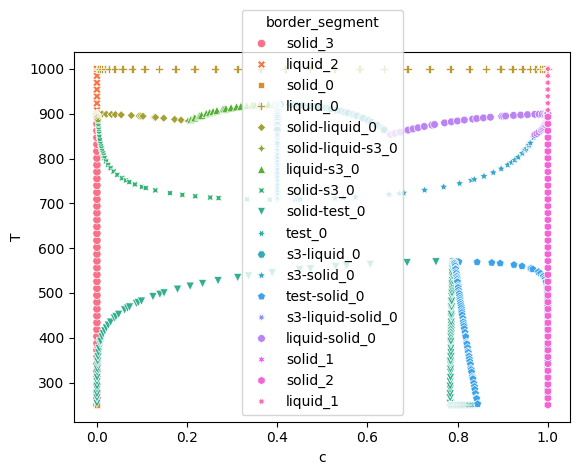

In [76]:
sns.scatterplot(
    data=ldc.get_transitions(df.query("stable")), x="c", y="T", hue="border_segment", style="border_segment"
)

In [40]:
re(ld.phases)
re(ld)

<module 'landau' from '/home/ponder/science/phd/dev/landau/landau/__init__.py'>

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_va

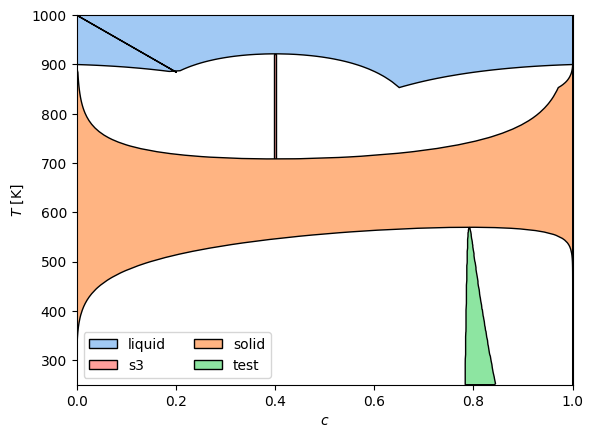

In [77]:
ld.plot_phase_diagram(df)
# plt.ylim(750, 1000)

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)
/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_va

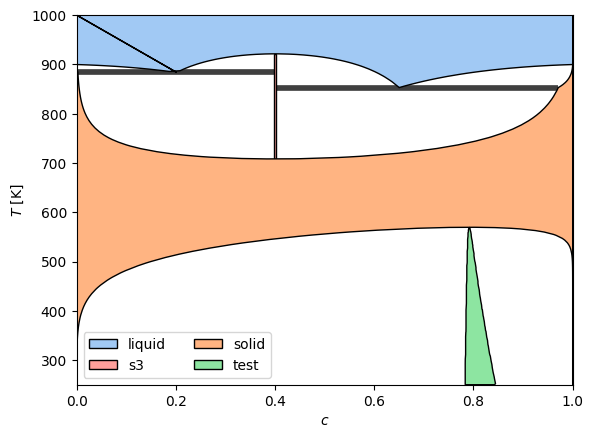

In [78]:
ld.plot_phase_diagram(df, tielines=True)
# plt.ylim(750, 1000)

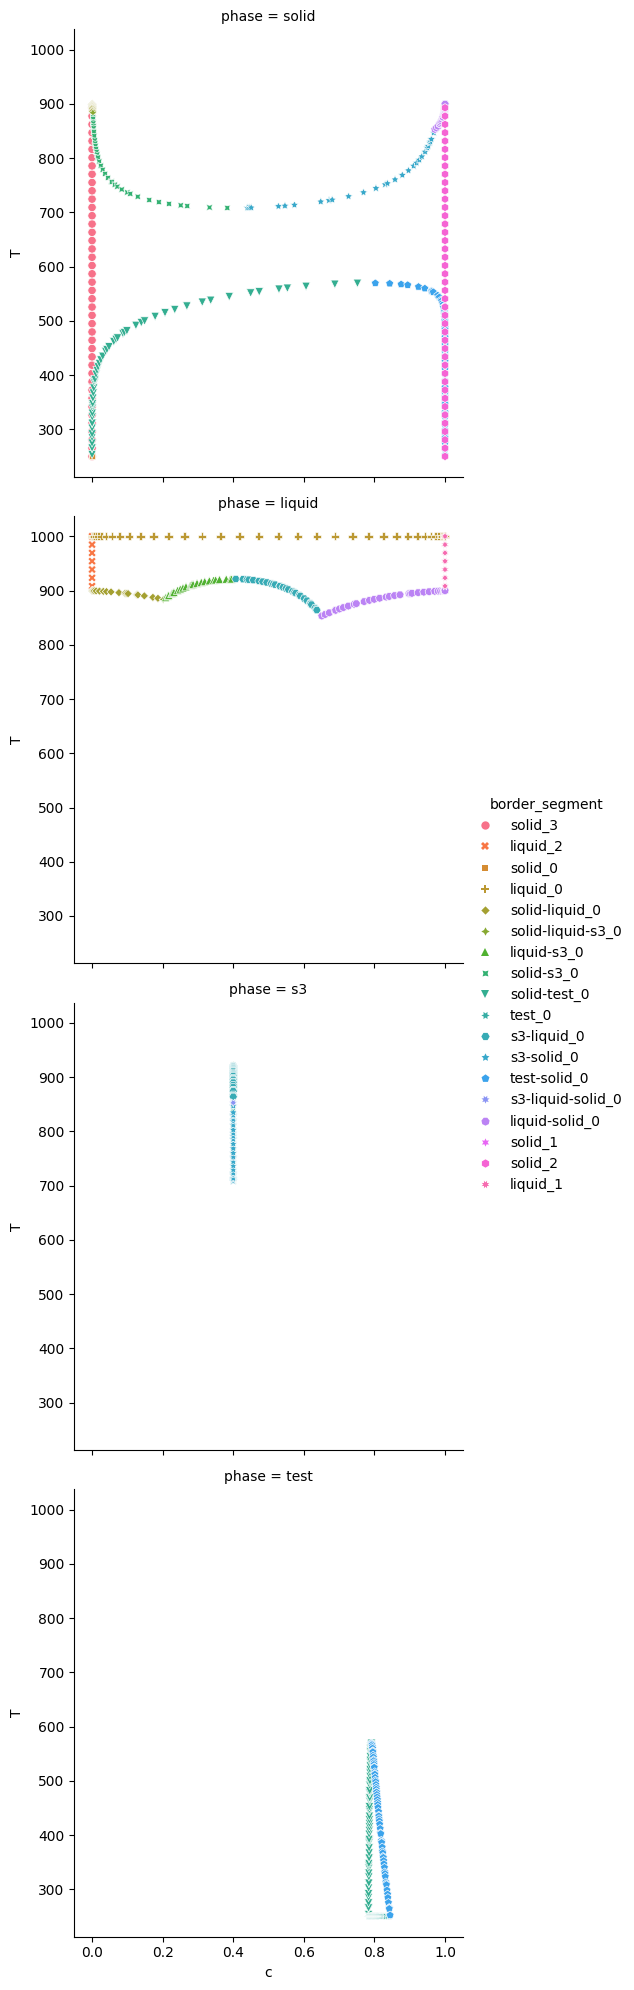

In [82]:
sns.relplot(
    data=ldc.get_transitions(df),
    row="phase",  # col_wrap=4,
    x="c",
    y="T",
    hue="border_segment",
    style="border_segment",
)

/home/ponder/science/phd/dev/landau/.venv/lib/python3.13/site-packages/sklearn/decomposition/_pca.py:586: RuntimeWarning: invalid value encountered in divide
  explained_variance_ = (S**2) / (n_samples - 1)


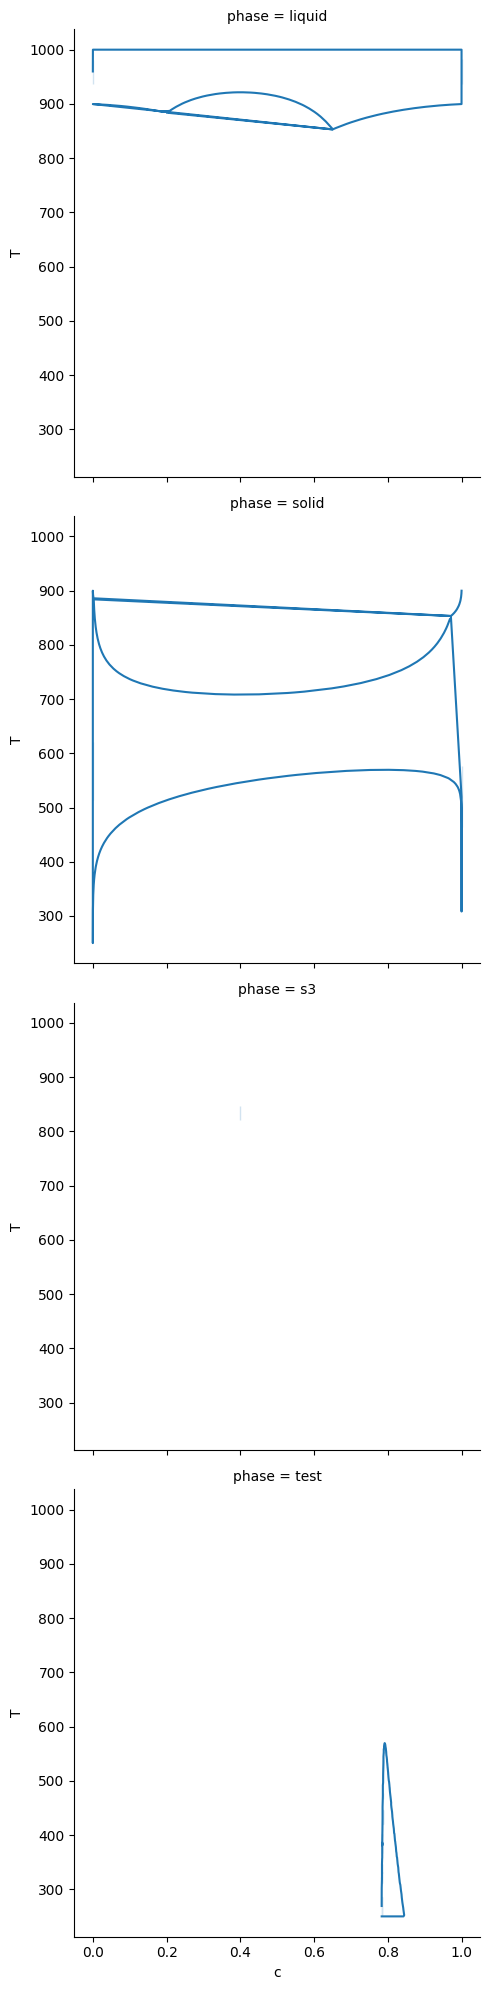

In [89]:
sns.relplot(data=ldp.sort_segments(ldc.get_transitions(df)), kind="line", sort=False, x="c", y="T", row="phase")